In [131]:
import matplotlib
matplotlib.rc('text', usetex=True)
import numpy as np
import soap
import scipy.stats as st
import matplotlib.pyplot as plt

In [5]:
data = st.chi2.rvs(2,size=(400,180))

In [85]:
data[:,10] += 3

In [86]:
track = soap.single_detector(soap.tools.tr_p(1),data)

In [87]:
randomtracks = np.array(np.random.rand(5000,len(data))*len(data[1])).astype(int)

In [135]:
rstarts = np.array(np.random.rand(50000)*len(data[1])).astype(int)
rtracks = []
for st in rstarts:
    tr = [st]
    for i in range(len(data)-1):
        val = tr[-1] + int(np.random.rand(1)*3 - 1.5)
        if val >= len(data[0]) or val <= 0:
            val = tr[-1]
        tr.append(val)
    rtracks.append(np.array(tr))

In [124]:
track.max_end_prob

1738.2234881611969

In [136]:
np.shape(rtracks)

(50000, 400)

In [137]:
powers = []
for tr in rtracks:
    powers.append(np.sum([data[i,j] for i,j in enumerate(tr)] ))
        

Text(0.5, 0, 'Statistic value')

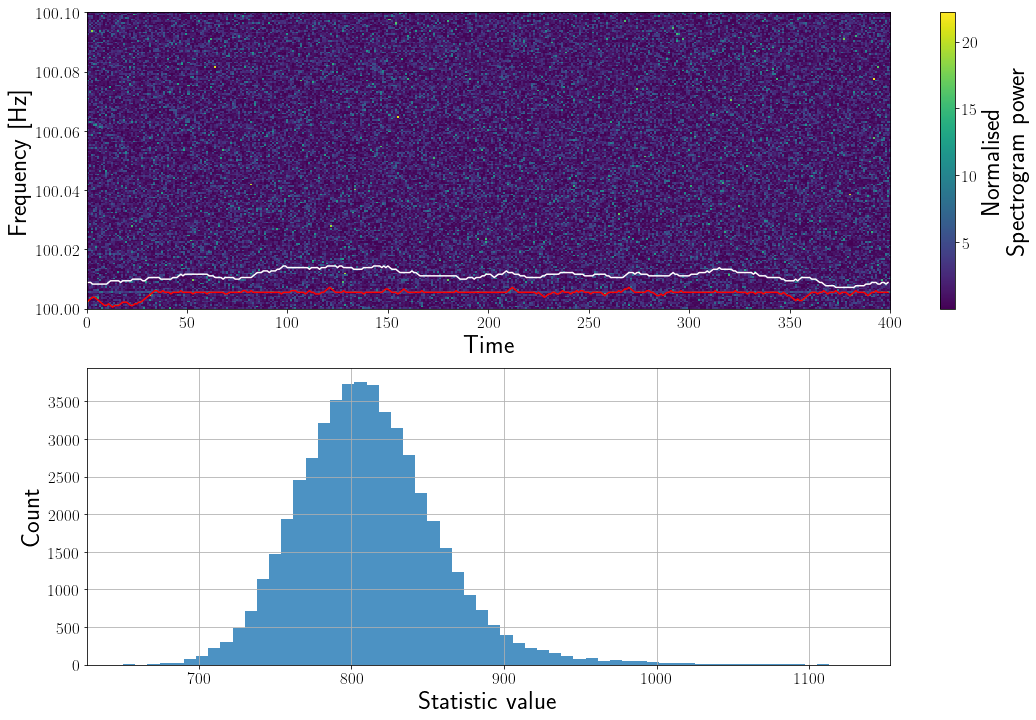

In [153]:
fig, ax = plt.subplots(figsize=(18,12),nrows=2)
im = ax[0].imshow(data.T,origin="lower",aspect="auto",extent=[0,400,100.0,100.1])
line = ax[0].plot(track.opt_path/1800. + 100,"r")
liner = ax[0].plot(rtracks[10]/1800. + 100,"w")

box = ax[1].get_position()
ax[1].set_position([box.x0, box.y0, box.width * 0.8 , box.height])
hist = ax[1].hist(powers,bins = 60,histtype="stepfilled",alpha=0.8)
ax[1].grid(True)
#ax.set_ylim([100.0,100.1])]
fns = 25
cbar=fig.colorbar(im,ax=ax[0])
cbar.ax.tick_params(labelsize=17)
cbar.set_label(label="Normalised \n Spectrogram power",fontsize=25)
ax[0].tick_params(axis='both', which='major', labelsize=17)
ax[1].tick_params(axis='both', which='major', labelsize=17)
ax[0].set_ylabel("Frequency [Hz]",fontsize=fns)
ax[0].set_xlabel("Time",fontsize=fns)
ax[1].set_ylabel("Count",fontsize=fns)
ax[1].set_xlabel("Statistic value",fontsize=fns)

In [154]:
fig.savefig("/Users/josephbayley/projects/thesis/C2_soap/soap_spect_motivation.pdf",format="pdf")